# <img src="https://upload.wikimedia.org/wikipedia/commons/0/08/Netflix_2015_logo.svg" width="150" style="vertical-align: middle;"> 
# Netflix Dataset Exploration

#### Netflix is an American subscription video on-demand over-the-top streaming service. The service primarily distributes original and acquired films and television shows from various genres and it is available internationally in multiple languages.  Originally a DVD-by-mail service founded in 1997 by Reed Hastings and Marc Randolph, it launched its streaming service in 2007 and is now a leading global entertainment provider with millions of paid members in over 190 countries.

#### The dataset contains key information on Netflix’s content library, including the title,type (movie or TV show), genre, country of origin, director, release year, date added on Netflix and rating.
#### This data allows us to perform an exploratory analysis to uncover trends in content availability, regional diversity, and genre distribution.

#### This exploratory data analysis (EDA) aims to uncover insights into Netflix’s catalog and help understand viewer preferences and platform growth over time.

In [1]:
# import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# import the dataset
df = pd.read_csv('https://raw.githubusercontent.com/kanupriya-rawat/Netflix-EDA/main/netflix.csv')

In [3]:
df.head()  # displayed the first five rows of the dataset

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [4]:
df.info() # provides the basic information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


The dataset contains 10 columns and 8790 rows. 
Also the dataset has 9 categorical columns and 1 numerical column.

In [5]:
df.isnull().sum() # to check the null values in the dataset

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

There is no null value in the dataset

In [6]:
df['title'].duplicated().sum() # to check the duplicate values in the title column

np.int64(3)

There are 3 duplicate titles in the dataset

In [7]:
df.drop_duplicates(subset=['title'], inplace=True) # removed the three duplicate titles from the dataset

In [8]:
df['date_added']=pd.to_datetime(df['date_added'])  # converted the data-type of 'date_added' from object type to datetime type
df['date_added_year']=df['date_added'].dt.year  # extracted the year from 'date_added' column
df['date_added_month']=df['date_added'].dt.month_name()  # extracted the month name from 'date_added' column

In [9]:
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,date_added_year,date_added_month
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries,2021,September
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",2021,September
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",2021,September
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies",2021,September
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",2021,September


In [10]:
df.describe()  # gives the statistical information of the numerical columns

,date_added,release_year,date_added_year
count,8787,8787.000000,8787.000000
mean,2019-05-17 22:37:53.813588224,2014.181746,2018.873677
min,2008-01-01 00:00:00,1925.000000,2008.000000
25%,2018-04-06 00:00:00,2013.000000,2018.000000
50%,2019-07-04 00:00:00,2017.000000,2019.000000
75%,2020-08-20 00:00:00,2019.000000,2020.000000
max,2021-09-25 00:00:00,2021.000000,2021.000000
std,NaN,8.826635,1.573808


#### 1) How many movies vs. TV shows are on Netflix?

In [11]:
print(df['type'].value_counts())

type
Movie      6124
TV Show    2663
Name: count, dtype: int64


In [12]:
data=df['type'].value_counts()
labels=['Movie', 'TV Show']
explode=(0.05,0)
colors=['#E50914', '#221F1F']

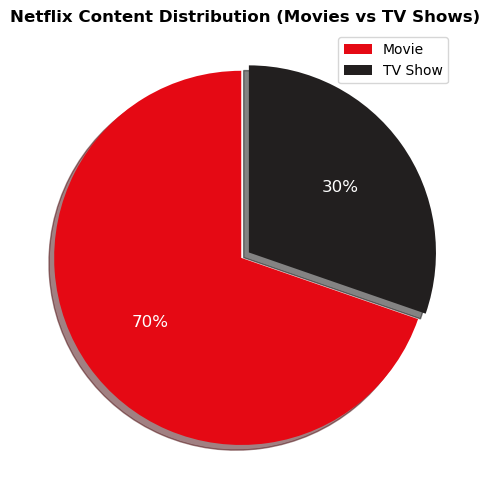

In [13]:
plt.figure(figsize=(5,5))
plt.pie(data, labels=labels, colors=colors, explode=explode, autopct='%0.0f%%', shadow=True, startangle=90, textprops={'fontsize': 12, 'color': 'white'})
plt.title('Netflix Content Distribution (Movies vs TV Shows)', fontweight='bold')
plt.legend()
plt.axis('equal')
plt.tight_layout()
plt.savefig('content_distribution.png')
plt.show()

* Netflix's content library is heavily skewed toward movies, which make up **70% of the movie** titles compared to just **30% for TV shows**.
* This distribution reflects a strategic focus on attracting movie viewers and leveraging the popularity of films across various genres.
* Despite being a smaller portion of the library, TV shows still play a crucial role in retaining subscribers through serialized storytelling and original series that engage audiences over longer periods.

#### 2) How has Netflix’s content library grown over the years?

In [14]:
netflix_growth=df.groupby('date_added_year')['type'].value_counts().reset_index(name='count')

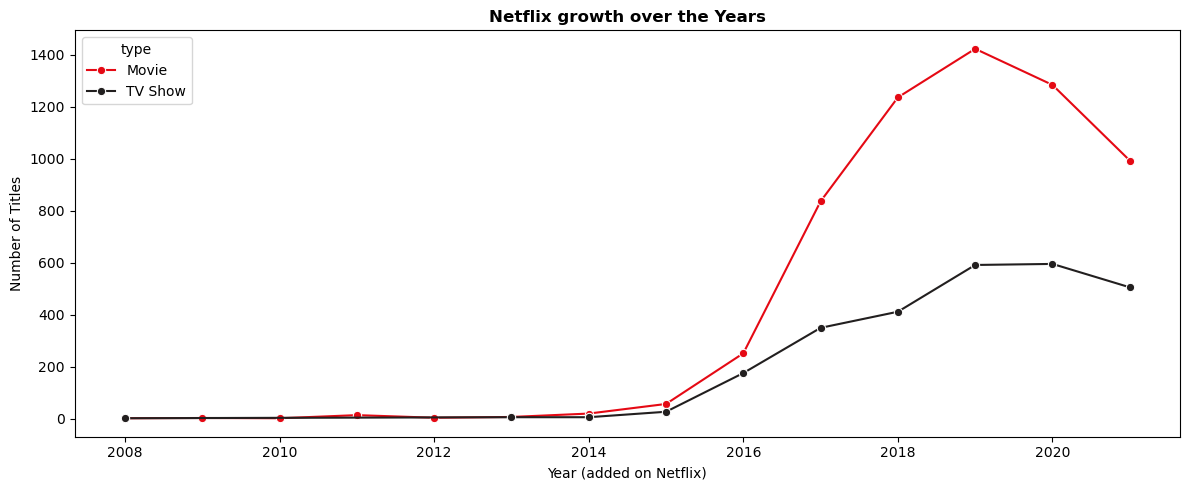

In [15]:
plt.figure(figsize=(12,5))
sns.lineplot(data=netflix_growth, x='date_added_year', y='count', hue='type', marker='o',palette={'Movie': '#E50914', 'TV Show': '#221F1F'})
plt.title('Netflix growth over the Years', fontweight='bold')
plt.xlabel('Year (added on Netflix)')
plt.ylabel('Number of Titles')
plt.tight_layout()
plt.savefig('netflix_growth.png')
plt.show()

* The number of movies and TV shows on Netflix **increased sharply after 2015**, focusing on acquiring and producing more films and series.
* Movies peaked around **2019 with nearly 1400 titles** added, while TV shows grew steadily and peaked in **2019–2020**.
* After 2020, both movies and shows dropped, likely due to the pandemic and production slowdowns.

#### 3) What is the distribution of new titles added to Netflix by month?

In [16]:
added_month=df['date_added_month'].value_counts().reset_index(name='count')

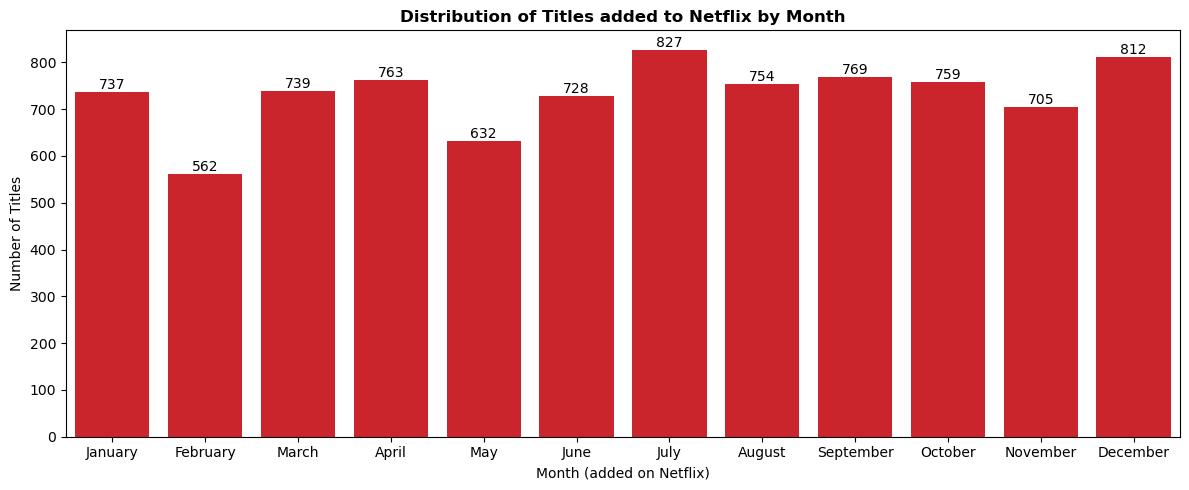

In [17]:
plt.figure(figsize=(12,5))
ax=sns.barplot(added_month, x='date_added_month', y='count', color='#E50914', 
               order=['January','February','March','April','May','June','July','August','September', 'October', 'November','December'])
for container in ax.containers:
    ax.bar_label(container)
plt.title('Distribution of Titles added to Netflix by Month', fontweight='bold')
plt.xlabel('Month (added on Netflix)')
plt.ylabel('Number of Titles')
plt.tight_layout()
plt.show()

* The peak month for new Netflix titles is **July (827)**, followed by **December (812)**, September(769) and April (763).
* The lowest month is **February (562)** titles.
* Most months average between 700–750 titles. May (632) and November (705) are slightly lower.
* The second half of the year generally sees more additions, likely due to the festive season and winter holidays.

#### 4) How has the release year of Netflix movies and TV shows evolved over time?

In [18]:
released_years=df['release_year'].value_counts().reset_index(name='count')

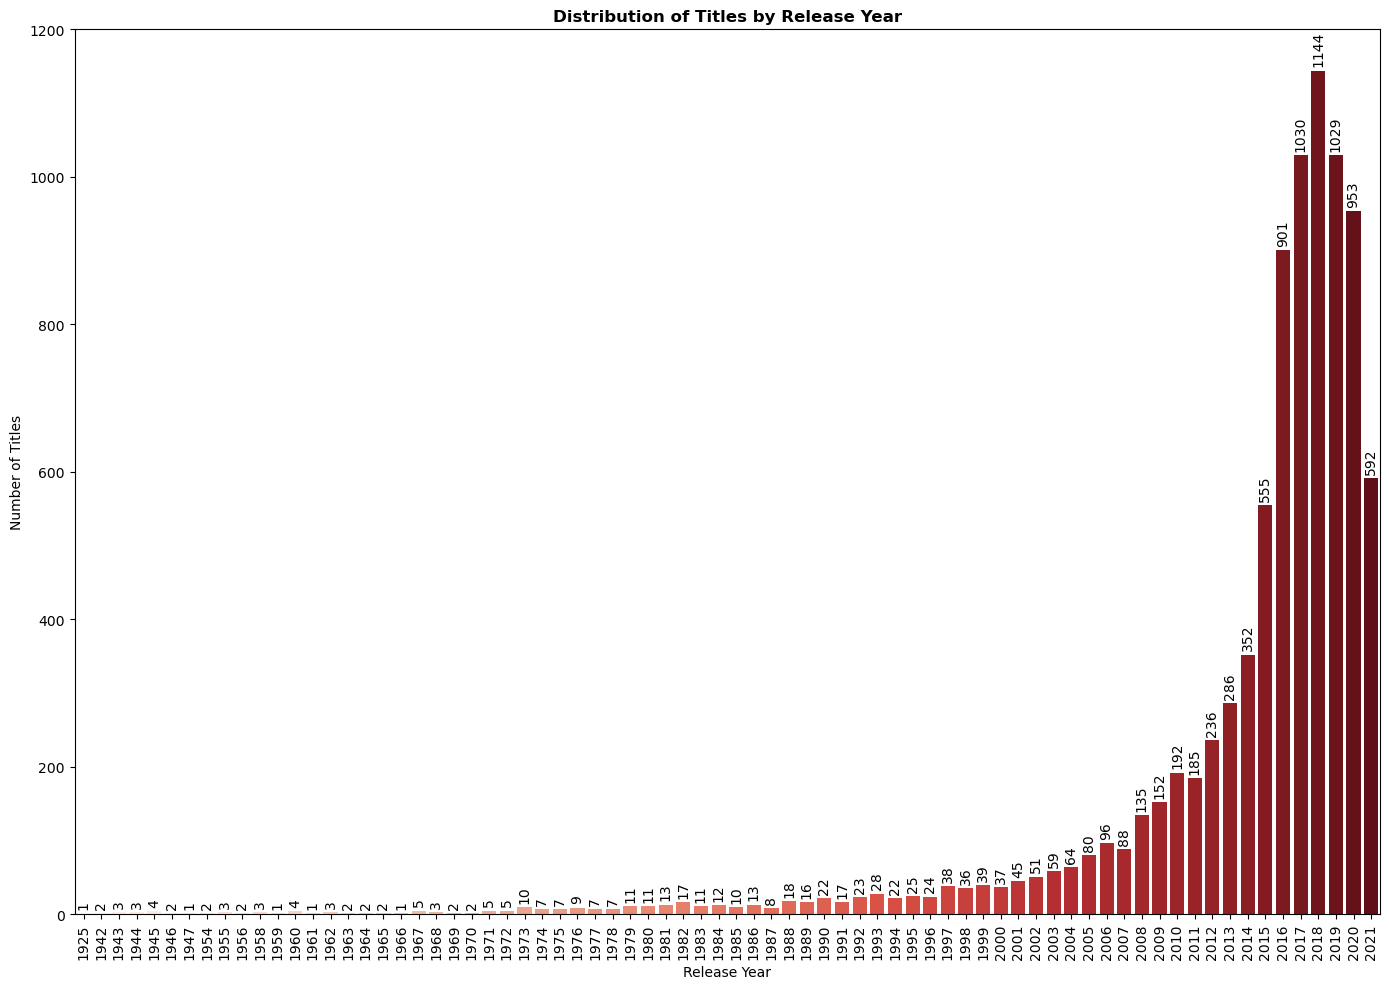

In [19]:
plt.figure(figsize=(14,10))
ax=sns.barplot(data=released_years, x='release_year', y='count', palette='Reds',  errorbar=None)
for container in ax.containers:
    ax.bar_label(container, rotation=90, padding=3)
plt.title('Distribution of Titles by Release Year', fontweight='bold')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.ylim(0,1200)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

* The chart shows the release year distribution of movies and TV shows available on Netflix.
* Very few titles are from before 1980, suggesting limited representation of very old classics.
* From the 1990s onwards, the number of titles steadily increases, showing stronger availability of modern content.
* The sharp rise between 2010 and 2020 highlights that Netflix’s catalog is dominated by relatively recent productions. A clear peak is observed around 2017-2019
* After 2020, the count drops possibly due to the COVID-19 pandemic affecting film and TV production worldwide.

#### 5) Which countries produce the most Netflix content?

In [20]:
top_countries=df['country'].value_counts().head(20).reset_index(name='count')

In [21]:
top_countries=top_countries[top_countries['country']!='Not Given']

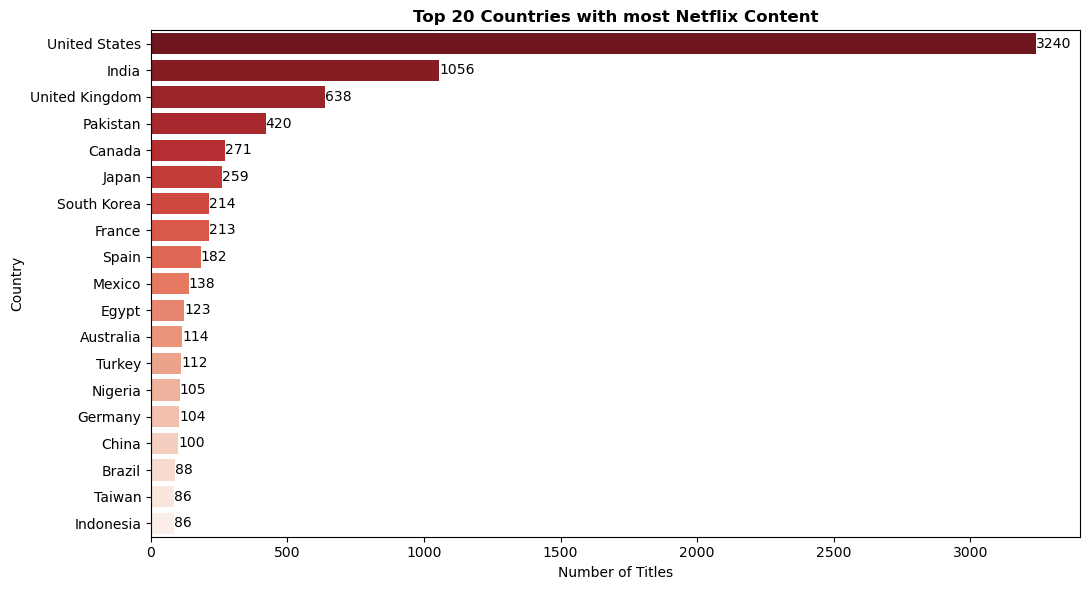

In [22]:
plt.figure(figsize=(11,6))
ax=sns.barplot(data=top_countries, x='count', y='country', palette='Reds_r')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Top 20 Countries with most Netflix Content', fontweight='bold')
plt.ylabel('Country')
plt.xlabel('Number of Titles')
plt.tight_layout()
plt.savefig('top_countries.png')
plt.show()

* The **United States** leads by a big margin with **3240 titles**, followed by **India (1056)** and the **UK (638)**.
* This shows Netflix’s strong base in the US, but also rapid growth in Asian markets like India, Pakistan, Japan and South Korea, reflecting Netflix's commitment to diversifying its content library and catering to a global audience.

#### 6) Which genres are most common on OTT platforms?

In [23]:
df_genre=df.copy()  # made a new dataframe 'df_genre' which is the copy of the original dataframe 'df'
df_genre['genre'] = df_genre['listed_in'].str.split(', ') # splits the genres in the 'listed_in' column into lists and assigns it to a new column 'genre'.
df_genre = df_genre.explode('genre')  # explodes the lists in the 'genre' column so that each genre has its own row, duplicating the other data in the row and can easily counts the value of genre

In [24]:
top_genre=df_genre['genre'].value_counts().head(10).reset_index(name='count')

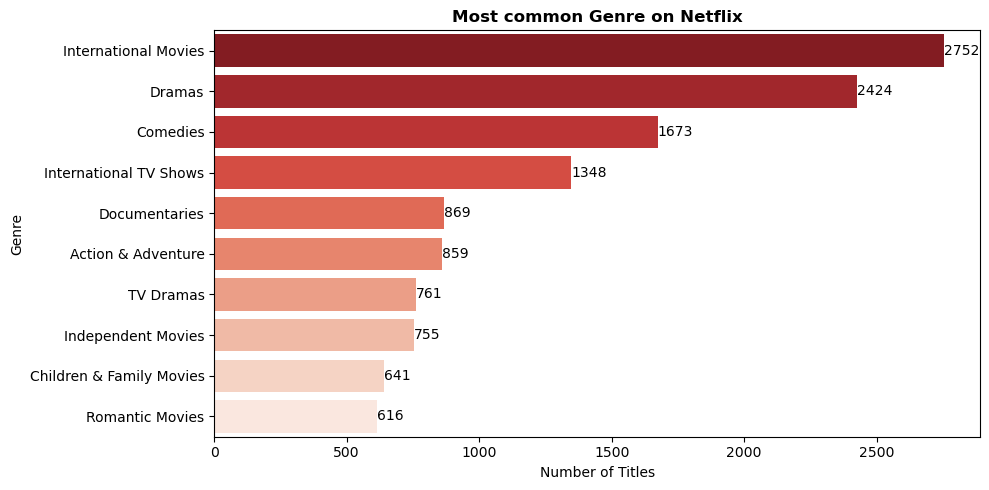

In [25]:
plt.figure(figsize=(10,5))
ax=sns.barplot(top_genre, y='genre', x='count', palette='Reds_r')
for labels in ax.containers:
    ax.bar_label(labels)
plt.title('Most common Genre on Netflix', fontweight='bold')
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.tight_layout()
plt.savefig('common_genre.png')
plt.show()

* The most common genres on Netflix are **International Movies (2752)** and **Dramas (2424)**, followed by Comedies (1673), this shows Netflix’s strong focus on drama-heavy and global content.
* International TV Shows also appear in the top list, highlighting Netflix’s worldwide reach.
* Genres like Action, Documentaries and TV Dramas give balance to the library.
* Genres like Independent Movies, Children & Family and Romance ensure the platform caters to every audience segment.

#### 7) What’s the distribution of ratings for movies and shows?

In [26]:
ratings=df['rating'].value_counts().reset_index(name='count')

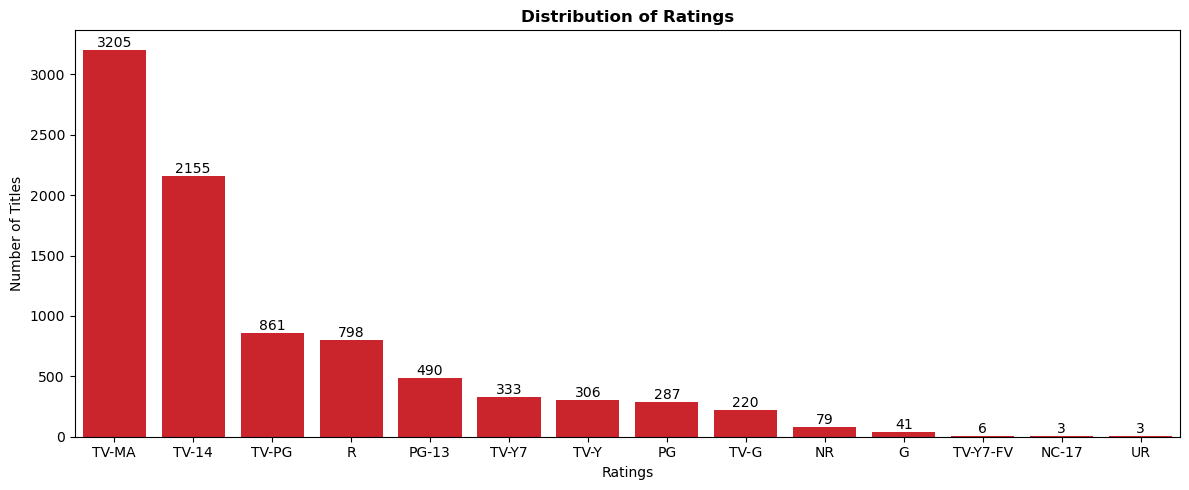

In [27]:
plt.figure(figsize=(12,5))
ax=sns.barplot(data=ratings, x='rating', y='count',color='#E50914')
ax.bar_label(ax.containers[0])
plt.title('Distribution of Ratings', fontweight='bold')
plt.xlabel('Ratings')
plt.ylabel('Number of Titles')
plt.tight_layout()
plt.savefig('rating_distribution.png')
plt.show()

* Most Netflix titles are rated **TV-MA (3205) and TV-14 (2155)**, showing that the platform is mainly focused on **mature and teen audiences**.
* Family-friendly ratings like PG, TV-Y, and TV-G are much fewer in number.
* Ratings such as G, NC-17, and UR are extremely rare.
* This means Netflix prioritizes content for adults and young adults rather than kids.

#### 8) Who are the most frequent directors on OTT?

In [28]:
df_directors=df.copy()  # made a new dataframe 'df_directors', which is the copy of the original dataframe 'df'
df_directors['directors']=df_directors['director'].str.split(', ') # splits the director's name from the 'director' column into lists and assigns it to a new column 'directors'.
df_directors=df_directors.explode('directors') # explodes the lists in the 'directors' column so that each director's name  has its own row, duplicating the other data in the row and can easily counts the value of directors.

In [29]:
director_count=df_directors['directors'].value_counts().reset_index(name='count')
director_count=director_count.iloc[1:11]

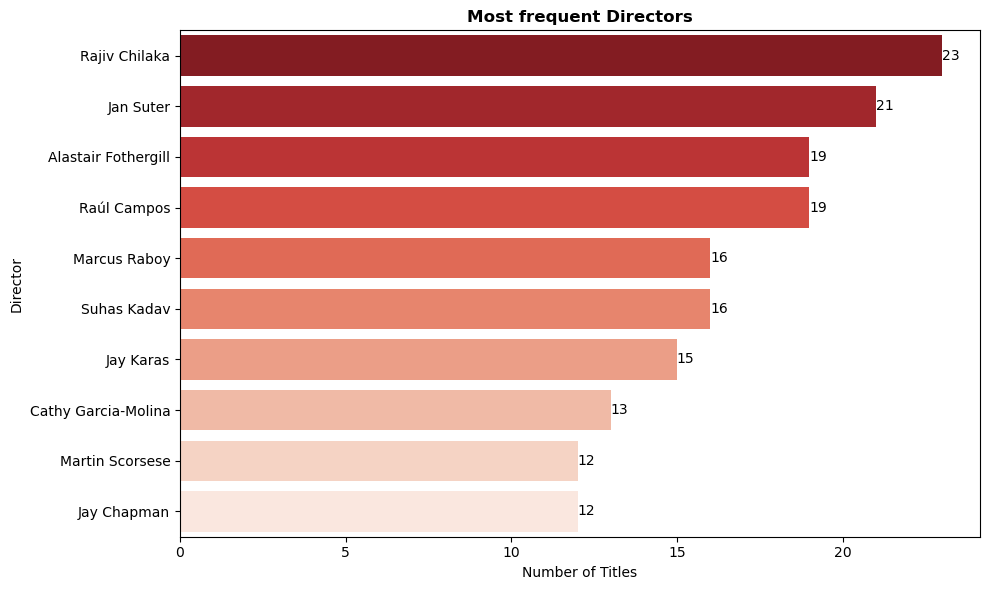

In [30]:
plt.figure(figsize=(10,6))
ax=sns.barplot(data=director_count, x='count', y='directors', palette='Reds_r')
for containers in ax.containers:
    ax.bar_label(containers)
plt.title('Most frequent Directors', fontweight='bold')
plt.xlabel('Number of Titles')
plt.ylabel('Director')
plt.tight_layout()
plt.show()

* **Rajiv Chilaka** leads as the most frequent director on Netflix with **23 titles**, followed closely by **Jan Suter with 21**.
* Alastair Fothergill and Raúl Campos share the third spot with 19 titles each.
* It also reflects diversity, featuring both globally renowned names like Martin Scorsese and regional creators like Suhas Kadav.

#### 9) What is the distribution of Movie and TV Show runtime?

##### Movies runtime

In [31]:
df1=df.copy()

In [32]:
df1['duration']=df['duration'].str.extract('(\d+)').astype(int)  #extracts the numeric part from the strings in the 'duration' column and converts them into string

In [33]:
movie_runtime = df1[df1['type']=='Movie']['duration'].value_counts().reset_index(name='count')

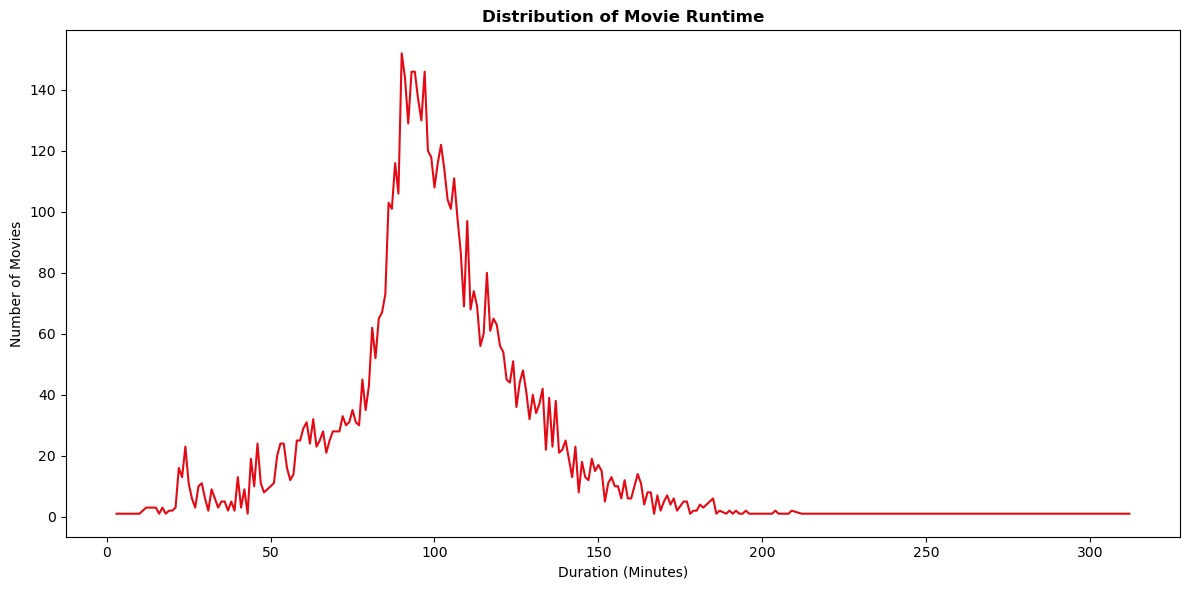

In [34]:
plt.figure(figsize=(12,6))
sns.lineplot(data=movie_runtime, x='duration',y='count', color='#E50914')
plt.title('Distribution of Movie Runtime', fontweight='bold')
plt.xlabel('Duration (Minutes)')
plt.ylabel('Number of Movies')
plt.tight_layout()
plt.show()

* The majority of movies are between **80 to 120 minutes**, with a clear **peak** around **90–100 minutes**, which is considered the standard movie length.
* This suggests that Netflix’s catalog mostly follows the industry norm of feature-length films rather than very short or very long formats.

##### TV Show runtime

In [35]:
show_runtime = df1[df1['type']=='TV Show']['duration'].value_counts().reset_index(name='count')

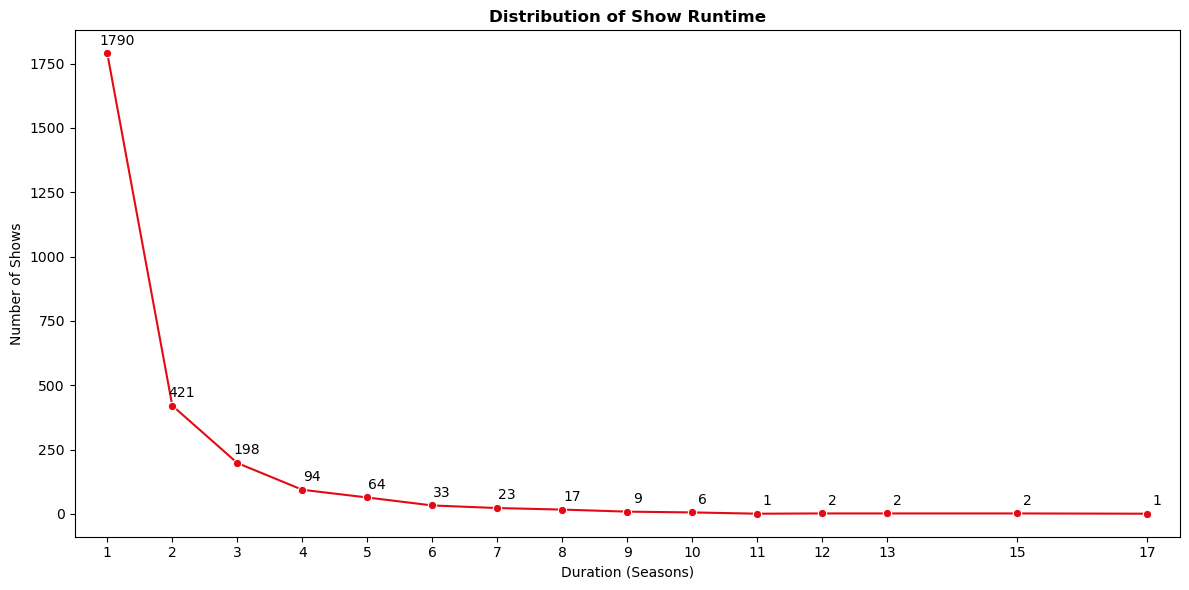

In [36]:
plt.figure(figsize=(12,6))
ax = sns.lineplot(data=show_runtime, x='duration', y='count', marker='o', color='#E50914')
for x, y in zip(show_runtime['duration'], show_runtime['count']):
    plt.annotate(text=f'{y}',xy=(x, y),xytext=(7,4),textcoords='offset points', ha='center', va='bottom', fontsize=10, color='black')
plt.title('Distribution of Show Runtime', weight='bold')
plt.xlabel('Duration (Seasons)')
plt.ylabel('Number of Shows')
plt.xticks(show_runtime['duration'])
plt.xlim(0.5, 17.5)
plt.tight_layout()
plt.show()

* The chart shows that most TV shows have only **1 season (1790 shows)**, with a sharp decline as the season count increases.
* As the number of seasons grows, the number of shows drops drastically, with only 1 show having 17 seasons.
* This indicates that most shows are **short-lived** or designed as **limited series**.

#### 10) What are the oldest and newest titles available on netflix?

In [37]:
oldest_title=df.sort_values(by='date_added')
print('The oldest title added on Netflix')
oldest_title.head(1)

The oldest title added on Netflix


,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,date_added_year,date_added_month
4253,s5958,Movie,To and From New York,Sorin Dan Mihalcescu,United States,2008-01-01,2006,TV-MA,81 min,"Dramas, Independent Movies, Thrillers",2008,January


In [38]:
newest_title=df.sort_values(by='date_added', ascending=False)
print('The newest title added on Netflix')
newest_title.head(1)

The newest title added on Netflix


,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,date_added_year,date_added_month
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries,2021,September


In [39]:
from wordcloud import WordCloud, STOPWORDS

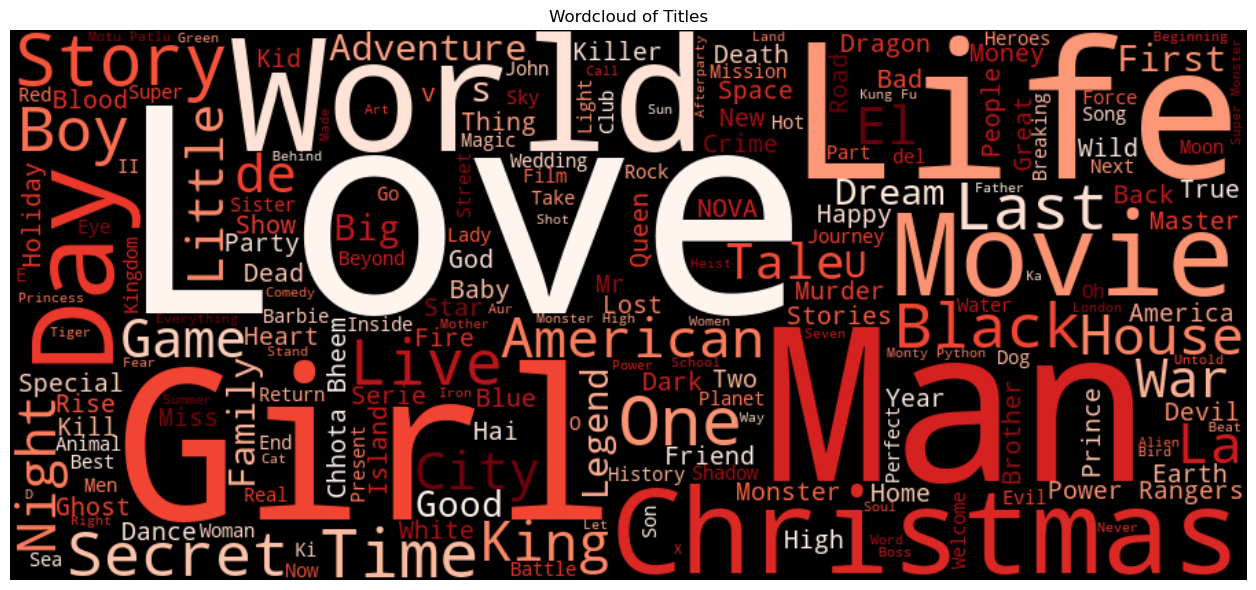

In [40]:
text = " ".join(df['title'].dropna().astype(str).tolist())
wc = WordCloud(width=900, height=400, background_color='black', colormap='Reds', stopwords=STOPWORDS).generate(text)
plt.figure(figsize=(15,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title('Wordcloud of Titles')
plt.tight_layout()
plt.savefig('title_wordcloud.png')
plt.show()

#### Key Results

* Netflix’s content library is dominated by Movies (70%) compared to TV Shows.

* United States, India, and UK are the top content-producing countries.

* A major spike in Netflix content occurred after 2015, showing global expansion.

* The most common content rating is TV-MA, suggesting a focus on adult audiences.

* International Movies and Dramas are among the fastest-growing categories.

* Most Movies are 90–120 minutes long and most TV Shows have 1–2 seasons.

#### About Me

I'm Kanupriya Rawat, and I explored the Netflix dataset to gain insights using EDA.  
Feel free to connect: www.linkedin.com/in/kanupriyarawat or https://github.com/kanupriya-rawat
